# Phase segregation Analysis

In order to check the tendency of Li$_{1.2}$Mn$_{0.8-x}$Sn$_{x}$O$_{2}$ to segregate into two phases, we need to compare its energy versus the two phases which we expect it to segregate in. In case we assume the final phases to be a Li,Mn-rich and Li,Sn-rich phase, the reaction that we want to investigate is the following:

$$
Li_{1.2}Mn_{0.8-x}Sn_{x}O_{2} \rightarrow (1-\frac{x}{0.8}) \cdot Li_{1.2}Mn_{0.8}O_{2} + \frac{x}{0.8} \cdot Li_{1.2}Sn_{0.8}O_{2}
$$

The formation energy of the Sn-doped structure versus these reaction products is:

$$
E_f(x) = E(Li_{1.2}Mn_{0.8-x}Sn_{x}O_{2}) - (1-\frac{x}{0.8}) \cdot E(Li_{1.2}Mn_{0.8}O_{2}) - \frac{x}{0.8} \cdot E(Li_{1.2}Sn_{0.8}O_{2})
$$


> **Note**: As the code below relies on my own pre-alpha code ([pybat](https://github.com/mbercx/pybat)), it is possible that the code has changed since this jupyter notebook was set up. Please contact me via [researchgate](https://www.researchgate.net/profile/Marnik_Bercx) if you run into any issues, or have questions.

In [1]:
# Notebook header <---- Always run this cell first!
import os, json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import tikzplotlib

from monty.json import MontyDecoder
from pymatgen import Element, Composition
from icet.tools.convex_hull import ConvexHull

from support_functions import get_energy, get_structure, set_up_convexhull_data

figures_dir = "../../../figures/batteries"

color0 = "#3373A8"
color1 = "#B93033"
# color0 = "#163D5C"
# color1 = "#B1CCE3"
color2 = "#3AA99F"
color3 = "#EECF5A"
color4 = "#E65239"
color5 = "#B81F1F"
color6 = "#2368A2"
color7 = "#0B164D"
color8 = "#0A5085"

In [2]:
with open("data/honey_data.json", "r") as file:
    composition_dict = json.loads(file.read(), cls=MontyDecoder)

In [3]:
# Set up the convex hull data

Li29Mn19O48_energy = min(
    [data["energy"] / 24 for data in composition_dict["Li29Mn19O48"]]
)
Li29Sn19O48_energy = min(
    [data["energy"] / 24 for data in composition_dict["Li29Sn19O48"]]
)

endpoint_energies = [Li29Mn19O48_energy, Li29Sn19O48_energy]

concentrations = []
mixing_energies = []

for data_list in composition_dict.values():
    
    set_up_convexhull_data(
        data_list=data_list, element=Element("Sn"),
        ref_composition=Composition("Li29Sn19O48")/24,
        endpoint_energies=endpoint_energies, 
    )
    concentrations.extend(
        [data["concentration"] for data in data_list]
    )
    mixing_energies.extend(
        [data["mixing_energy"] for data in data_list]
    )

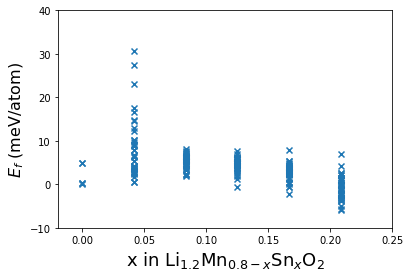

In [4]:
# Plot the formation energies
mpl.rcParams['figure.dpi']= 200
%matplotlib inline

fig, ax = mpl.pyplot.subplots(figsize=(6, 4))
ax.set_xlabel(r'x in Li$_{1.2}$Mn$_{0.8 - x}$Sn$_x$O$_2$', fontsize=18)
ax.set_ylabel(r'$E_f$ (meV/atom)', fontsize=16)
ax.set_xlim([-0.02, 0.25])
ax.set_ylim([-10, 40])
ax.scatter(concentrations, 1e3 * np.array(mixing_energies) / 4,
           marker='x');

## Changing the end product

The Sn-rich end product considered in the reaction above is $Li_{1.2}Sn_{0.8}O_{2}$. However, one of the phases believed to be present in the substituted particles is $Li_2SnO_3$. Hence, it might be important to consider further decomposition of the Sn-rich end product:

$$
Li_{1.2}Sn_{0.8}O_{2} \rightarrow 0.6 \cdot Li_2SnO_3 + 0.2 \cdot SnO
$$

Which results in the following total reaction:

$$
Li_{1.2}Mn_{0.8-x}Sn_{x}O_{2} \rightarrow (1-\frac{x}{0.8}) \cdot Li_{1.2}Mn_{0.8}O_{2} + \frac{x}{0.8} \left[  0.6 \cdot Li_2SnO_3 + 0.2 \cdot SnO \right]
$$

For which the formation energy is:

$$
E_f(x) = E(Li_{1.2}Mn_{0.8-x}Sn_{x}O_{2}) - (1-\frac{x}{0.8}) \cdot E(Li_{1.2}Mn_{0.8}O_{2}) - \frac{x}{0.8} \left[ 0.6 E(Li_2SnO_3) + 0.2 E(SnO)\right]
$$


In [5]:
with open("data/SnO_data.json", "r") as file:
    SnO_dict = json.loads(file.read(), cls=MontyDecoder)

In [6]:
Li2SnO3_energy = SnO_dict["Li2SnO3"]["energy_per_fu"]
SnO_energy = SnO_dict["SnO"]["energy_per_fu"]

However, we need to tune the coefficients in the equation a bit to make sure that we accurately reproduce the composition of the Li-rich Sn-rich structure we used before:

In [7]:
coeff_a = 1.208333333 / 2
coeff_b = 0.1875 

print(Composition("Li29Sn19O48")/24)
print(coeff_a * Composition("Li2SnO3") + coeff_b * Composition("SnO"))

Li1.20833333 Sn0.79166667 O2
Li1.20833333 Sn0.79166667 O2.0


In [8]:
# The formation energy of Li1.2Sn0.8O2 versus Li2SnO3 and SnO is:
print(Li29Sn19O48_energy - coeff_a * Li2SnO3_energy - coeff_b * SnO_energy)

0.4588672562755729


This indicates that $Li_{1.2}Sn_{0.8}O_{2}$ is clearly unstable versus decay in $Li_2SnO_3$ and $SnO$. Let's now calculate the formation energy versus these end products, as in the equation above.

In [9]:
# Set up the convex hull data
endpoint_energies = [Li29Mn19O48_energy, 
                     coeff_a * Li2SnO3_energy + coeff_b * SnO_energy]

concentrations = []
mixing_energies = []

for data_list in composition_dict.values():
    set_up_convexhull_data(
        data_list=data_list, element=Element("Sn"),
        ref_composition=Composition("Li29Sn19O48")/24,
        endpoint_energies=endpoint_energies, 
    )
    concentrations.extend(
        [data["concentration"] for data in data_list]
    )
    mixing_energies.extend(
        [data["mixing_energy"] for data in data_list]
    )

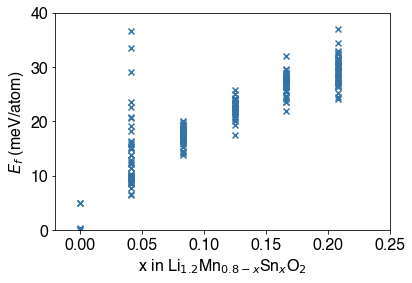

In [12]:
# Plot the formation energies
rc_font_dict = {"size": 16, "family": "sans-serif",
                "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
plt.rc("font", **rc_font_dict)

fig, ax = plt.subplots()
ax.set_xlabel(r'x in Li$_{1.2}$Mn$_{0.8 - x}$Sn$_x$O$_2$')
ax.set_ylabel(r'$E_f$ (meV/atom)')
ax.set_xlim([-0.02, 0.25])
ax.set_ylim([0, 40])
ax.scatter(concentrations, 1e3 * np.array(mixing_energies) / 4, # This plots the E_f in meV/atom.
           marker='x', color=color0)
#ax.plot(av_energy_dict.keys(), 1e3 * np.array(list(av_energy_dict.values())) / 4, '-*', color="red")
# plt.savefig(os.path.join(figures_dir, "Sn_mixing_energy.png"), 
#             bbox_inches='tight', dpi=600)
tikzplotlib.save(filepath=os.path.join(figures_dir, "Sn_mixing_energy-data.tex"), 
                 add_axis_environment=False)